In [26]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

random.seed(149)
pd.set_option('display.max_colwidth', -1)

In [69]:
def loaddata():
    return pd.read_csv('food_coded.csv')
data = loaddata()

In [8]:
data.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [298]:
# employment
probibility = data['employment'].value_counts() / data['employment'].value_counts().sum().tolist()
count_of_nas = pd.isna(data['employment']).sum()
values = probibility.cumsum().searchsorted(np.random.uniform(size=count_of_nas))
print probibility
for i in xrange(len(values)):
    if values[i] == 0: values[i] = 2
    elif values[i] == 1: values[i] = 3
    else: values[i] = 1
index = 0
for i in xrange(len(data.employment)):
    if pd.isnull(data.iloc[i].employment):
        data.loc[i, 'employment'] = values[index]
        index += 1


2.0    0.504
3.0    0.480
1.0    0.016
Name: employment, dtype: float64


In [223]:
data.type_sports = data['type_sports'].str.lower()
data.type_sports.unique()

array(['car racing', 'basketball ', 'none', nan, 'softball', 'none.',
       'soccer', 'field hockey', 'running', 'soccer and basketball ',
       'intramural volleyball', 'hockey', 'dancing ', 'basketball',
       'tennis', 'tennis soccer gym', 'gaelic football', 'ice hockey',
       'lacrosse ', 'snowboarding', 'none organized', 'lacrosse',
       'softball ', 'dancing', 'wrestling ', 'no particular engagement ',
       'volleyball', 'soccer ', 'wrestling & rowing', 'wrestling',
       'skiing', 'skiing ', 'water polo and running ', 'rowing ',
       'tennis  ', 'recreational basketball, equestrian team',
       'rec volleyball', 'baseball', 'i danced in high school',
       'horse back riding', 'competitive skiing',
       'rowing, running, and cycling', 'softball and basketball',
       'marching band', 'collegiate water polo', 'none right now',
       'volleyball, lacrosse', 'none ', 'fotball', 'crew',
       'football, basketball, volleyball, golf', 'hockey, soccer, golf',
      

In [312]:
data = loaddata()
sports = ['car racing', 'basketball', 'softball', 'soccer', 'field hockey', 'running', 'volleyball', 'hockey', \
          'dancing', 'tennis', 'gym', 'football', 'lacrosse', 'snowboarding', 'wrestling', 'rowing', 'skiing', \
         'water polo', 'baseball', 'horse back riding', 'golf']
sports.sort(key=len, reverse=True)
print data.type_sports.value_counts().sample(frac=1).head(15)
def func(x):
    output = ''
    for sport in sports:
        if pd.isnull(x): continue
        x = x.lower()
        if x.find(sport) != -1:
            output += sport + ','
            x.replace(sport, '')
    if len(output) == 0: return np.NaN
    return output[:-1]
data.type_sports = data.type_sports.apply(func=func)
# data.type_sports
# data = loaddata()
# data.type_sports
print "\n\nAfter Processing:\n", data.type_sports.value_counts().head(15)

When I can, rarely though play pool, darts, and basketball.    1
None at the moment                                             1
dancing                                                        1
Volleyball                                                     3
Soccer and basketball                                          1
Skiing                                                         1
intramural volleyball                                          1
Gaelic Football                                                1
basketball                                                     1
tennis soccer gym                                              1
Ice hockey                                                     2
horse back riding                                              1
wrestling                                                      1
Running                                                        1
Rec Volleyball                                                 1
Name: type_sports, dtype:

In [10]:
data.columns

Index([u'GPA', u'Gender', u'breakfast', u'calories_chicken', u'calories_day',
       u'calories_scone', u'coffee', u'comfort_food', u'comfort_food_reasons',
       u'comfort_food_reasons_coded', u'cook', u'comfort_food_reasons_coded.1',
       u'cuisine', u'diet_current', u'diet_current_coded', u'drink',
       u'eating_changes', u'eating_changes_coded', u'eating_changes_coded1',
       u'eating_out', u'employment', u'ethnic_food', u'exercise',
       u'father_education', u'father_profession', u'fav_cuisine',
       u'fav_cuisine_coded', u'fav_food', u'food_childhood', u'fries',
       u'fruit_day', u'grade_level', u'greek_food', u'healthy_feeling',
       u'healthy_meal', u'ideal_diet', u'ideal_diet_coded', u'income',
       u'indian_food', u'italian_food', u'life_rewarding', u'marital_status',
       u'meals_dinner_friend', u'mother_education', u'mother_profession',
       u'nutritional_check', u'on_off_campus', u'parents_cook',
       u'pay_meal_out', u'persian_food', u'self_percept

In [22]:
data.loc[:, [u'comfort_food_reasons_coded', u'comfort_food_reasons_coded.1', u'comfort_food_reasons']]


,comfort_food_reasons_coded,comfort_food_reasons_coded.1,comfort_food_reasons
0,9.0,9,we dont have comfort
1,1.0,1,"Stress, bored, anger"
2,1.0,1,"stress, sadness"
3,2.0,2,Boredom
4,1.0,1,"Stress, boredom, cravings"
5,4.0,4,"None, i don't eat comfort food. I just eat when i'm hungry."
6,1.0,1,"stress, boredom"
7,1.0,1,"I eat comfort food when im stressed out from school(finals week), when I`m sad, or when i am dealing with personal family issues."
8,2.0,2,Boredom
9,1.0,1,"Stress, anger and sadness"


In [ ]:
# TODO: Remove useless columns: non-coded columns
columns_we7sha = ["life_rewarding", "comfort_food_reasons_coded", "comfort_food_reasons"]

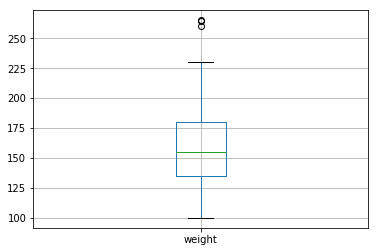

In [123]:
#
# data.loc[:, 'new_col'] = 
# data.loc[:, 'new_col']
# print data.columns
# data.boxplot(u'weight')
# plt.show()
data = loaddata()
def func(row):
    return unicode(row.weight)
data.weight = data.apply(func, 1)
data = data[data.weight.apply(lambda x: x.isnumeric())]
data.weight = data.weight.apply(lambda x: int(x))

data.boxplot('weight')
plt.show()

# filtered_data
# data.loc[:, 'calories_day']

In [67]:
data.loc[data['employment'] == 2, 'calories_day']


1      3.0
4      2.0
7      3.0
11     4.0
13     3.0
16     3.0
18     3.0
20     3.0
21     3.0
22     3.0
23     3.0
26     2.0
28     2.0
30     3.0
32     3.0
36     3.0
37     4.0
41     4.0
42     3.0
44     4.0
45     3.0
46     2.0
57     4.0
58     3.0
61     2.0
62     4.0
64     3.0
67     2.0
70     3.0
72     3.0
75     3.0
76     3.0
77     2.0
78     3.0
80     2.0
85     3.0
87     3.0
88     4.0
89     3.0
91     2.0
96     3.0
97     3.0
99     4.0
100    3.0
103    3.0
104    3.0
107    3.0
109    3.0
111    2.0
113    2.0
115    4.0
118    3.0
119    3.0
123    4.0
Name: calories_day, dtype: float64